# Pandas

In [140]:
import pandas as pd

Algunos métodos o atributos que se encuentran en pandas son

.head() que nos permite ver las primeras filas del dataframe, podemos indicar un parámetro en los 
paréntesis por si queremos ver más o menos filas. 

.info() muestra información de cada columna como su tipo ó cuántos valores faltantes tiene.

.shape NO LLEVA PARENTESIS, nos da el numero de filas y columnas del dataframe en una tupla

.describe() nos da un breve resumen de cálculos estadísticos básicos.

.values nos devuelve una lista de listas (un arreglo en 2D-numpy), donde cada lista es una linea del dataframe.

.columns nos da una serie con los nombres de cada columna del dataframe.

.index nos da una serie con los nombres de los indices de cada fila

## Ordenar y extraer información de un dataframe

In [141]:
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr =  [True, False, False, False, True, True, True]
cpc = [809, 731, 588, 18, 200, 70, 45]
cars_dict = { 'country':names, 'drives_right':dr, 'cars_per_cap':cpc }
cars = pd.DataFrame(cars_dict)
cars['cpc100'] = cars['cars_per_cap'] / 100

# dataframe de prueba

Para ordenar los datos por una o más columnas, usamos .sort_values()

In [142]:
cars.sort_values(['country', 'cars_per_cap'], ascending = [False, True])

,country,drives_right,cars_per_cap,cpc100
0,United States,True,809,8.09
4,Russia,True,200,2.00
5,Morocco,True,70,0.70
2,Japan,False,588,5.88
3,India,False,18,0.18
6,Egypt,True,45,0.45
1,Australia,False,731,7.31


Para indexar en un dataframe, si queremos más de una condición al mismo tiempo, podemos hacerlo de la siguiente manera

In [143]:
cars[(cars['drives_right'] == True) & (cars['cars_per_cap'] > 70)]

# el simbolo & se puede pensar con un "y", para el "o" usamos |

,country,drives_right,cars_per_cap,cpc100
0,United States,True,809,8.09
4,Russia,True,200,2.00


Otra manera de hacerlo es usando lo siguiente (esto se usa cuando buscamos más de 3 ó 4 elementos en alguna columna del dataframe) 

In [144]:
cars[cars['country'].isin(['Morocco', 'Japan', 'Australia'])]

,country,drives_right,cars_per_cap,cpc100
1,Australia,False,731,7.31
2,Japan,False,588,5.88
5,Morocco,True,70,0.70


## Algunas funciones estadísticas 

Podemos aplicar estas funciones a cualquier columna que queramos del dataframe (aplicar el maximo, minimo, percentiles, etc) de la siguiente manera

In [145]:
cars['cars_per_cap'].mean()

351.57142857142856

Las funciones min() y max() también pueden ser aplicadas a columnas cuyos datos sean fechas

In [146]:
cars['cars_per_cap'].quantile(0.5)

# nos da el percentil 50% de la columna cars per cap

200.0

## Método .agg()

Este método nos permite aplicar una o más funciones a un dataframe

In [147]:
# definimos 
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

cars['cars_per_cap'].agg(iqr)

# en este caso, le aplicamos la función iqr a la columna cars per cap

602.0

Para aplicar la función antes definida a más columnas de dataframe, podemos hacerlo de la siguiente manera

In [148]:
cars[['cars_per_cap', 'cpc100']].agg(iqr)

cars_per_cap    602.00
cpc100            6.02
dtype: float64

También podemos aplicar más de una función a varias columnas, por ejemplo

In [149]:
import numpy as np

In [150]:
cars[['cars_per_cap', 'cpc100']].agg([iqr, np.median])

,cars_per_cap,cpc100
iqr,602.0,6.02
median,200.0,2.00


Otras funciones que pueden ser de ayuda son la suma acumulada, producto acumulado, etc, las podemos usar de la siguiente manera

In [151]:
cars['cars_per_cap'].cumsum()

0     809
1    1540
2    2128
3    2146
4    2346
5    2416
6    2461
Name: cars_per_cap, dtype: int64

## Conteos con Pandas

Para borrar contenidos duplicados en un dataframe, usamos el método .drop_duplicates()

In [152]:
cars[['cars_per_cap', 'drives_right']].drop_duplicates()

# en este caso, se respeta la jerarquía de la lista, recordar ejemplo de los mismos nombres y distinto apellido

,cars_per_cap,drives_right
0,809,True
1,731,False
2,588,False
3,18,False
4,200,True
5,70,True
6,45,True


Podemos combinar entre alguna característica del dataframe y luego remover elementos repetidos, por ejemplo

In [153]:
cars[cars['cars_per_cap'] > 45].drop_duplicates(subset = 'drives_right')

,country,drives_right,cars_per_cap,cpc100
0,United States,True,809,8.09
1,Australia,False,731,7.31


Para contar los elementos de una columna, usamos el método .value_counts()

In [154]:
cars['cars_per_cap'].value_counts()

18     1
70     1
200    1
809    1
731    1
588    1
45     1
Name: cars_per_cap, dtype: int64

También, podemos mostrarlo en modo de porcentajes

In [155]:
cars['cars_per_cap'].value_counts(normalize = True)

18     0.142857
70     0.142857
200    0.142857
809    0.142857
731    0.142857
588    0.142857
45     0.142857
Name: cars_per_cap, dtype: float64

## Método .groupby()

Nos ayuda a realizar múltiples cálculos a columnas agrupadas por algún criterio usándolo a la par con el método .agg()

In [156]:
cars.groupby('drives_right')['cars_per_cap'].sum()

# primero agrupa el dataframe por la columna drives right, luego, toma los valores de la columna cars_per_cap y suma según si manejaban del lado
# derecho o izquierdo.

drives_right
False    1337
True     1124
Name: cars_per_cap, dtype: int64

In [157]:
cars.groupby('drives_right').sum()

# aplica la función sum a las columnas que pueda

,cars_per_cap,cpc100
drives_right,,
False,1337,13.37
True,1124,11.24


Podemos agrupar también por dos ó más columnas de la siguiente manera

In [158]:
cars.groupby(['drives_right', 'country'])['cars_per_cap'].sum()

drives_right  country      
False         Australia        731
              India             18
              Japan            588
True          Egypt             45
              Morocco           70
              Russia           200
              United States    809
Name: cars_per_cap, dtype: int64

Combinando esto con el método .agg(), podemos hacer cálculos como los siguientes

In [159]:
cars.groupby('drives_right').agg([np.min, np.max, np.mean])

# aplica las funciones que aparecen en la lista dentro de args a todas las columnas que se puede 

cars_per_cap                  cpc100                
                     amin amax        mean   amin  amax      mean
drives_right                                                     
False                  18  731  445.666667   0.18  7.31  4.456667
True                   45  809  281.000000   0.45  8.09  2.810000

In [160]:
cars.groupby('drives_right')['cars_per_cap'].agg([np.min, np.max, np.mean])

# aplica las funciones a la columna cars per cap agrupados segun si manejan del lado derecho

,amin,amax,mean
drives_right,,,
False,18,731,445.666667
True,45,809,281.000000


También podemos aplicar esto a ciertas columnas

In [161]:
cars.groupby('drives_right')['cars_per_cap', 'cpc100'].agg([np.min, np.max, np.mean])

<ipython-input-161-b89de0c7f6ef>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cars.groupby('drives_right')['cars_per_cap', 'cpc100'].agg([np.min, np.max, np.mean])


cars_per_cap                  cpc100                
                     amin amax        mean   amin  amax      mean
drives_right                                                     
False                  18  731  445.666667   0.18  7.31  4.456667
True                   45  809  281.000000   0.45  8.09  2.810000

## Tablas dinámicas 

Para crear una tabla dinámica, usamos el método .pivot_table(), veremos algunos de sus argumentos. Generalmente tienen la misma función que groupby() pero los resultados lucen diferentes

In [162]:
cars.pivot_table(values = 'cpc100', index = 'drives_right')

# values serán los valores a los que se les aplicará la función, mientras que index es la etiqueta de las filas
# por defecto la tabla dinámica saca la el promedio (ver tabla de arriba)

,cpc100
drives_right,
False,4.456667
True,2.810000


También podemos aplicar más de una función

In [163]:
cars.pivot_table(values = 'cpc100', index = 'drives_right', aggfunc = [np.mean, np.median])

,mean,median
,cpc100,cpc100
drives_right,,
False,4.456667,5.88
True,2.810000,1.35


También podemos pasar más de un índice 

In [164]:
cars.pivot_table(values = 'cpc100', index = ['drives_right', 'country'], aggfunc = [np.mean, np.median])

mean median
                           cpc100 cpc100
drives_right country                    
False        Australia       7.31   7.31
             India           0.18   0.18
             Japan           5.88   5.88
True         Egypt           0.45   0.45
             Morocco         0.70   0.70
             Russia          2.00   2.00
             United States   8.09   8.09

O hacerlo de la siguiente manera

In [165]:
cars.pivot_table(values = 'cpc100', index = 'drives_right', aggfunc = np.mean, columns = 'country')

country,Australia,Egypt,India,Japan,Morocco,Russia,United States
drives_right,,,,,,,
False,7.31,NaN,0.18,5.88,NaN,NaN,NaN
True,NaN,0.45,NaN,NaN,0.7,2.0,8.09


Podemos usar el parámetro fill_value = 0, para reemplazar nos NaN por ceros.

Por otra parte el parámetro margins = True nos muestra los totales por fila, columna y de toda la tabla como en excel

In [166]:
cars.pivot_table(values = 'cpc100', index = 'drives_right', aggfunc = np.mean, columns = 'country', fill_value = 0, margins = True)

country,Australia,Egypt,India,Japan,Morocco,Russia,United States,All
drives_right,,,,,,,,
False,7.31,0.00,0.18,5.88,0.0,0,0.00,4.456667
True,0.00,0.45,0.00,0.00,0.7,2,8.09,2.810000
All,7.31,0.45,0.18,5.88,0.7,2,8.09,3.515714


## índices

Para fijar un indice en un dataframe, lo hacemos con el método .set_index('nombre_columna') y para remover el o los índices .reset_index(), si además, en este último método ponemos el parámetro drop = True, la columna con los indices quedará eliminada.

También, podemos fijar más de un índice. Para poder indexar el dataframe con .loc, debemos hacerlo de la siguiente manera

filas = [('nombre_indice1', 'nombre_indice2'), ('nombre2_indice1', 'nombre2_indice2')]

df.loc[filas]

Esto nos devolverá las filas que cumplan lo que queremos

También podemos ordenar el dataframe según el indice que tengan, con el método .sort_index(), veremos algunos parámetros

In [167]:
cars1 = cars.set_index(['drives_right', 'country'])
cars1

cars_per_cap  cpc100
drives_right country                            
True         United States           809    8.09
False        Australia               731    7.31
             Japan                   588    5.88
             India                    18    0.18
True         Russia                  200    2.00
             Morocco                  70    0.70
             Egypt                    45    0.45

In [168]:
cars1.sort_index()

# ordena según el primer conunto de indices

cars_per_cap  cpc100
drives_right country                            
False        Australia               731    7.31
             India                    18    0.18
             Japan                   588    5.88
True         Egypt                    45    0.45
             Morocco                  70    0.70
             Russia                  200    2.00
             United States           809    8.09

In [169]:
cars1.sort_index(level = 'country')

# ordenamos según el segundo conjunto de índices

cars_per_cap  cpc100
drives_right country                            
False        Australia               731    7.31
True         Egypt                    45    0.45
False        India                    18    0.18
             Japan                   588    5.88
True         Morocco                  70    0.70
             Russia                  200    2.00
             United States           809    8.09

Lo anterior también se puede aplicar en dos niveles al mismo tiempo de la siguiente manera

In [170]:
cars1.sort_index(level = ['country', 'drives_right'], ascending = [False, True])

cars_per_cap  cpc100
drives_right country                            
True         United States           809    8.09
             Russia                  200    2.00
             Morocco                  70    0.70
False        Japan                   588    5.88
             India                    18    0.18
True         Egypt                    45    0.45
False        Australia               731    7.31

## Usando los métodos .loc[] y .iloc[] para indexar tablas dinámicas

Supongamos que tenemos una columna con fechas en el dataframe, si quisieramos añadir una columna con solamente los años, lo podemos hacer de la siguiente manera.

dataframe['año'] = dataframe['columna'].dt.year

Podemos cambiar 'year' por 'month' ó 'day'

In [171]:
tabla_dinamica = cars.pivot_table(values = 'cpc100', index = ['drives_right', 'country'], aggfunc = [np.mean, np.median])
tabla_dinamica

mean median
                           cpc100 cpc100
drives_right country                    
False        Australia       7.31   7.31
             India           0.18   0.18
             Japan           5.88   5.88
True         Egypt           0.45   0.45
             Morocco         0.70   0.70
             Russia          2.00   2.00
             United States   8.09   8.09

Podemos usar el método loc de la siguiente manera

In [172]:
tabla_dinamica.loc[False]

,mean,median
,cpc100,cpc100
country,,
Australia,7.31,7.31
India,0.18,0.18
Japan,5.88,5.88


In [173]:
tabla_dinamica.loc[False:True]

mean median
                           cpc100 cpc100
drives_right country                    
False        Australia       7.31   7.31
             India           0.18   0.18
             Japan           5.88   5.88
True         Egypt           0.45   0.45
             Morocco         0.70   0.70
             Russia          2.00   2.00
             United States   8.09   8.09

In [174]:
tabla_dinamica.loc[(False, 'Australia'):(True, 'Morocco')]

# sacamos las filas desde false australia hasta true morocco

mean median
                       cpc100 cpc100
drives_right country                
False        Australia   7.31   7.31
             India       0.18   0.18
             Japan       5.88   5.88
True         Egypt       0.45   0.45
             Morocco     0.70   0.70

Tambien podemos obtener ciertas columnas

In [175]:
tabla_dinamica.loc[(False, 'Australia'):(True, 'Morocco'), ('mean', 'cpc100')]

drives_right  country  
False         Australia    7.31
              India        0.18
              Japan        5.88
True          Egypt        0.45
              Morocco      0.70
Name: (mean, cpc100), dtype: float64

## Visualizando dataframes

In [176]:
import matplotlib.pyplot as plt

Algunos parámetros importantes son

dataframe.plot(x = 'nombre de columna del dataframe', y = 'nombre de columna del dataframe', kind = 'line', title = 'titulo')

Donde kind es el tipo de gráfico que queremos

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.html

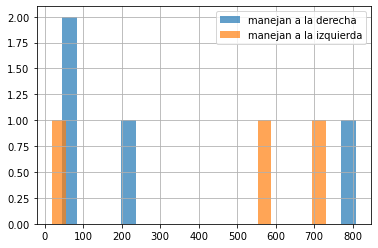

In [184]:
cars[cars['drives_right'] == True]['cars_per_cap'].hist(alpha = 0.7, bins = 20)
cars[cars['drives_right'] == False]['cars_per_cap'].hist(alpha = 0.7, bins = 20)
plt.legend(['manejan a la derecha', 'manejan a la izquierda'])
plt.show()

## Valores faltantes

La función .isna(), nos devuelve un dataframe de entradas booleanas, que da False si el valor del dataframe no es Na ó NaN, y True en caso contrario.

Podemos combinar esta función con .any (es decir, dataframe.isna().any()), la cual nos dirá cuales columnas contienen elementos nulos

Para eliminar filas con elementos faltantes, usamos dataframe.dropna() , aunque esto no es recomendable en todos los casos

Para reemplazar los valores faltantes con algún dato en específico, usamos dataframe.fillna(c), donde c puede tomar cualquier valor, por ejemplo c = 0